Wine Quality-Random Forest Classifier+simple EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
wine_data = pd.read_csv('winequality-red.csv')

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.shape

(1599, 12)

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data['total sulfur dioxide'].describe()

,total sulfur dioxide
count,1599.000000
mean,46.467792
std,32.895324
min,6.000000
25%,22.000000
50%,38.000000
75%,62.000000
max,289.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7a34591e6290>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3459208050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a34591f5fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a34592094d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3459209f10>],
 'means': []}

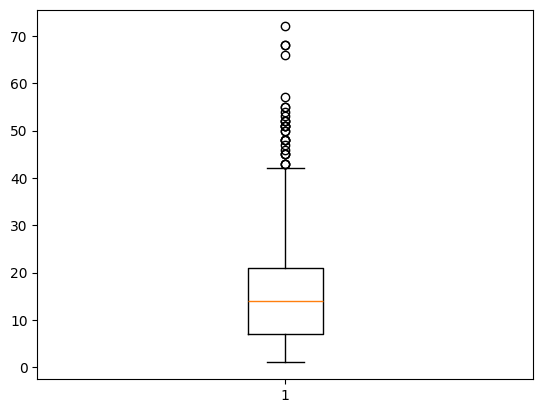

In [9]:
plt.boxplot(x=wine_data['free sulfur dioxide'])

The box plot for **free sulfur dioxide** in the wine dataset shows that the majority of values are concentrated between **5 and 25**, with a median around **15**. The **interquartile range (IQR)** is relatively small, indicating that most data points are close to each other. However, the presence of **numerous outliers above 40**, extending beyond **70**, suggests that a significant number of wines have unusually high levels of free sulfur dioxide compared to the majority of the dataset.

<Axes: xlabel='quality', ylabel='count'>

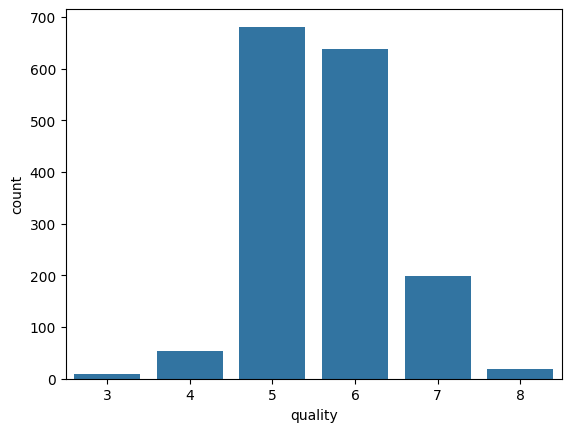

In [10]:
sns.countplot(data=wine_data, x=wine_data['quality'])

The count plot shows the distribution of wine quality ratings, with most wines rated **5 and 6**, making these the most common quality scores. The count for quality **5 is slightly higher than 6**, while ratings of **3, 4, 7, and 8** are significantly lower, indicating that extreme quality scores (both high and low) are less frequent in the dataset.

In [11]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


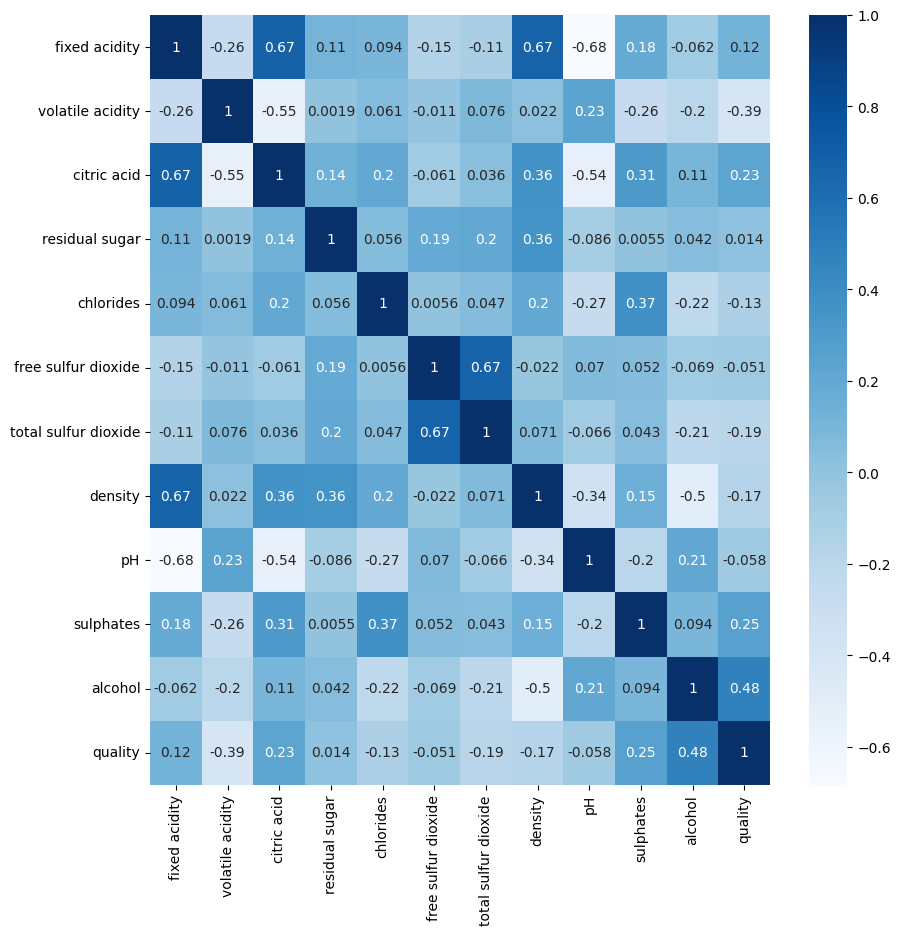

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data=wine_data.corr(), annot=True, cmap='Blues')
plt.show()

In [13]:
# handling outliers

#IQR = Q3 - Q1

Q1 = wine_data['total sulfur dioxide'].quantile(.25)
Q3 = wine_data['total sulfur dioxide'].quantile(.75)

IQR = Q3 -Q1


upper_bound_total = Q3 + IQR * 1.5
lower_bound_total = Q1 - IQR * 1.5

In [14]:
print(upper_bound_total)

122.0


In [15]:
print(lower_bound_total)

-38.0


In [16]:
Q1 = wine_data['free sulfur dioxide'].quantile(.25)
Q3 = wine_data['free sulfur dioxide'].quantile(.75)

IQR = Q3 -Q1


upper_bound_free = Q3 + IQR * 1.5
lower_bound_free = Q1 - IQR * 1.5

print(f'The upper boud of free sulfur dioxied is {upper_bound_free} while the lower bound is {lower_bound_free}')

The upper boud of free sulfur dioxied is 42.0 while the lower bound is -14.0


In [17]:
print(upper_bound_total)

122.0


In [18]:
outliers_total = wine_data[(wine_data['total sulfur dioxide'] > upper_bound_total) | (wine_data['total sulfur dioxide'] < lower_bound_total)]

In [19]:
print(outliers_total)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
86              8.6             0.490         0.28             1.9      0.110   
88              9.3             0.390         0.44             2.1      0.107   
90              7.9             0.520         0.26             1.9      0.079   
91              8.6             0.490         0.28             1.9      0.110   
92              8.6             0.490         0.29             2.0      0.110   
109             8.1             0.785         0.52             2.0      0.122   
130             8.0             0.745         0.56             2.0      0.118   
145             8.1             0.670         0.55             1.8      0.117   
154             7.1             0.430         0.42             5.5      0.070   
155             7.1         

In [20]:
outliers_free = wine_data[(wine_data['free sulfur dioxide'] > upper_bound_free) | (wine_data['free sulfur dioxide'] < lower_bound_free)]

In [21]:
outliers = pd.concat([outliers_free,outliers_total])

In [22]:
print(outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
57              7.5             0.630         0.12             5.1      0.111   
396             6.6             0.735         0.02             7.9      0.122   
400             6.6             0.735         0.02             7.9      0.122   
...             ...               ...          ...             ...        ...   
1493            7.7             0.540         0.26             1.9      0.089   
1496            7.7             0.540         0.26             1.9      0.089   
1559            7.8             0.600         0.26             2.0      0.080   
1560            7.8             0.600         0.26             2.0      0.080   
1561            7.8             0.600         0.26             2.0      0.080   

      free sulfur dioxide  

In [23]:
outliers.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7
1400,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,5
1419,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
1493,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5


In [24]:
wine_data_without_outliers= wine_data.drop(outliers_total.index)

In [25]:
print(wine_data_without_outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [26]:
wine_data_without_outliers.drop(columns=['free sulfur dioxide', 'pH','density','citric acid'])

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,34.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,67.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,54.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,60.0,0.58,9.8,6
4,7.4,0.700,1.9,0.076,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,44.0,0.58,10.5,5
1595,5.9,0.550,2.2,0.062,51.0,0.76,11.2,6
1596,6.3,0.510,2.3,0.076,40.0,0.75,11.0,6
1597,5.9,0.645,2.0,0.075,44.0,0.71,10.2,5


In [27]:
model = RandomForestClassifier()

In [28]:
X = wine_data_without_outliers.drop('quality', axis =1)
y = wine_data_without_outliers['quality']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [10,20,30]
}

In [32]:
grid_search = GridSearchCV(model,param_grid=param)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [34]:
print(grid_search.best_params_)

{'max_depth': 20, 'n_estimators': 300}


In [35]:
model = RandomForestClassifier(max_depth=20,n_estimators=300)

In [36]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [37]:
y_predict = model.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test,y_predict)

In [39]:
print(f"accuracy score is :{accuracy:.2f}")

accuracy score is :0.68


The dataset contains 1,599 samples of red wine quality data, with 12 attributes, including chemical properties such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, sulfur dioxide levels, density, pH, sulfates, alcohol, and the quality rating. Initial data exploration reveals no missing values, and statistical summaries show that features like total sulfur dioxide and free sulfur dioxide have outliers. A correlation analysis using a heatmap indicates that alcohol and sulphates positively influence wine quality, while volatile acidity negatively impacts it. Box plots and count plots further highlight the distribution of various features and their relationship with quality.

To handle outliers, the interquartile range (IQR) method was applied to identify extreme values in total sulfur dioxide and free sulfur dioxide. Many data points exceed the upper bound, indicating potential outliers that may need further processing. These outliers could be removed or transformed depending on their impact on model performance. Understanding these distributions is crucial for preprocessing before training a machine learning model, such as a Random Forest Classifier, to predict wine quality. Proper feature scaling, outlier handling, and feature selection will enhance the accuracy and reliability of the classification model.